In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
def vx(t):
    a=np.empty(t.shape)
    a[::]=10.
    return a

def vy(t):
    return 9.8*t

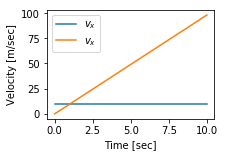

In [11]:
t=np.linspace(0,10)
plt.figure(figsize=(3,2))
ax=gca()
ax.plot(t,vx(t),label=r'$v_x$')
ax.plot(t,vy(t),label=r'$v_x$')
ax.set_xlabel(r'Time [sec]')
ax.set_ylabel(r'Velocity [m/sec]')
legend()

In [38]:
def x(t):
    a=np.empty(t.shape)
    a[::]=10.*t
    return a

def y(t):
    return 0.5*9.8*t**2

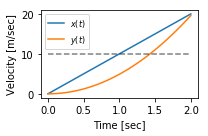

In [39]:
t=np.linspace(0,2)
fig=plt.figure(figsize=(3,2))
ax=gca()
ax.plot(t,x(t),label=r'$x(t)$')
ax.plot(t,y(t),label=r'$y(t)$')
ax.set_xlabel(r'Time [sec]')
ax.set_ylabel(r'Velocity [m/sec]')
legend(fontsize=8)

fig.tight_layout()
fig.savefig('/tmp/1.png',dpi=300)
a=t.copy()
a[::]=10.
ax.plot(t,a,'--',c='k',alpha=0.5)
fig.savefig('/tmp/2.png',dpi=300)

## Euler method applied for y(t)

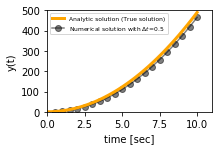

In [127]:
t=0.
y_nu=0.
n=20.
dt=10./float(n)

ts=[]
ys=[]
while (t<10):
    y_nu=y_nu+9.8*dt*t
    #plot(t,y_nu,'ok')
    t=t+dt
    ts.append(t)
    ys.append(y_nu)    

fig=plt.figure(figsize=(3,2))
ax=fig.add_subplot(111)
ax.set_ylim(0,500)
ax.set_xlim(0.,11)


t=np.linspace(0,10)
ax.plot(t,y(t),label='Analytic solution (True solution)',c='orange',lw=3)
ax.set_ylim(0,500)
ax.set_xlim(0.,11)

fig.tight_layout()

fig.savefig('/tmp/1.png',dpi=300,bbox_inches='tight')

ax.plot(ts,ys,'k-o',label=r'Numerical solution with $\Delta t$=%2.1f'%dt,alpha=0.5,zorder=-1)
ax.set_ylim(0,500)
ax.set_xlim(0.,11)
ax.set_xlabel(r'time [sec]')
ax.set_ylabel(r'y(t)')
ax.legend(fontsize=6)


fig.savefig('/tmp/%i.png'%n,dpi=300,bbox_inches='tight')



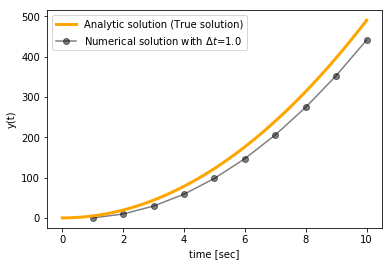

In [133]:
t=0.
y_nu=0.
dt=1
ts=[]
ys=[]
while (t<10):
    y_nu=y_nu+9.8*dt*t
    #plot(t,y_nu,'ok')
    t=t+dt
    ts.append(t)
    ys.append(y_nu)    

t=np.linspace(0,10)
ax=gca()
ax.plot(t,y(t),label='Analytic solution (True solution)',c='orange',lw=3)
ax.plot(ts,ys,'k-o',label=r'Numerical solution with $\Delta t$=%2.1f'%dt,alpha=0.5,zorder=-1)
ax.set_xlabel(r'time [sec]')
ax.set_ylabel(r'y(t)')
ax.legend()


    n     x     y
    0 0.000 1.000
    1 1.000 2.000
    2 2.000 4.000
    3 3.000 8.000
    4 4.000 16.000


(0, 60)

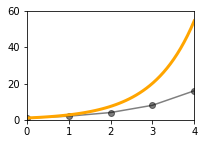

In [256]:
x0=0.
xf=4.001
dx=1.
y0=1.

x=x0*1.
y=y0*1.

c=y/np.exp(x)

fig=plt.figure(figsize=(3,2))
ax=fig.add_subplot(111)

xs=[]
ys=[]
print '%5s %5s %5s'%('n','x','y')
i=0
while (x<=xf):
    xs.append(x)
    ys.append(y)
    print '%5i %5.3f %5.3f'%(i,x,y)
    y=y*(1+dx)
    x=x+dx
    i=i+1

    

x=np.linspace(x0,xf)
y=c*np.exp(x)
plot(x,y,label='Analytical solution (True solution)',c='orange',lw=3)
plot(xs,ys,'k-o',alpha=0.5,zorder=-1,label='Numerical Solution with $\Delta t$=%.2f'%dx)


ax.set_xlim(0,4)
ax.set_ylim(0,60)
#legend()

In [227]:
from scipy import interpolate 
intp=interpolate.interp1d

Text(0,0.5,'Error (%)')

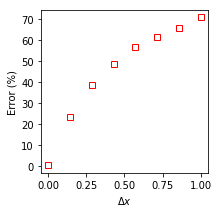

In [255]:
def euler_dydx(x0=0.,y0=1.,xf=4.001,dx=1e-3,):
    x=x0*1.
    y=y0*1.

    c=y/np.exp(x)

    xs=[]
    ys=[]
    i=0
    while (x<xf+dx):
        xs.append(x)
        ys.append(y)
        y=y*(1+dx)
        x=x+dx
        i=i+1
        
        
    func=intp(xs,ys)
    y=func(xf)
    return y

x0=0.
y0=1.

dxs=np.linspace(1,1e-3,8)
errs=np.zeros(dxs.shape)

for i in range(len(dxs)):
    dx=dxs[i]
    xf=4
    c=y0/np.exp(x0)

    ys=euler_dydx(x0,y0,xf,dx)
    y=c*np.exp(xf)
    errs[i]=(y-ys)/y*100

    
fig=plt.figure(figsize=(3,3))
ax=fig.add_subplot(111)
ax.plot(dxs,errs,'s',mfc='None',c='red')

ax.set_xlabel(r'$\Delta x$')
ax.set_ylabel(r'Error (%)')
#ax.set_xlim(1,0)

In [258]:
np.exp(xf)*c

54.65277549135438